In [1]:
from pandas_datareader import data  
from datetime import datetime
import pandas_datareader as pdr
import pandas as pd
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## S&P Futures from late 2010 to early 2021

In [2]:
start = datetime(2010,7,2)
end = datetime(2021,1,24)
# NASDAQ FUTURES
df = pdr.get_data_yahoo('ES=F', start, end)

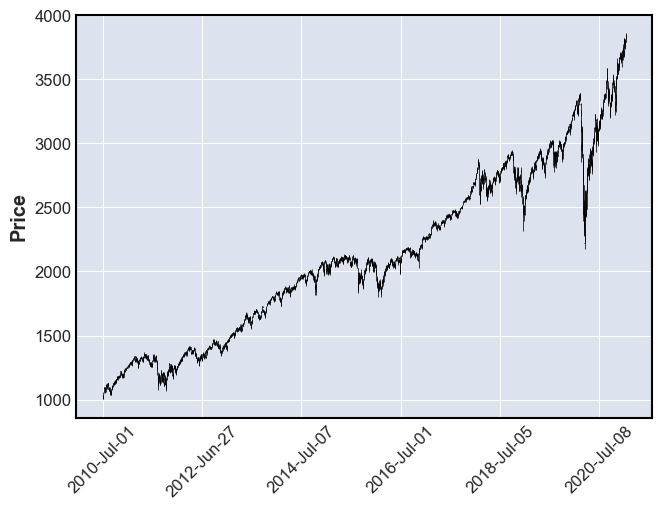

In [3]:
mpf.plot(df)

In [4]:
df['day_name'] = df.index.day_name()
df['close_lag1'] = df['Close'].shift(1)
df['diff'] = df['Close'] / df['Open']

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close,day_name,close_lag1,diff
Date,,,,,,,,,
2010-07-01,1029.75,1006.00,1024.50,1021.75,3354900.0,1021.75,Thursday,NaN,0.997316
2010-07-02,1032.50,1010.75,1022.25,1014.25,2135335.0,1014.25,Friday,1021.75,0.992174
2010-07-06,1038.50,1002.75,1015.00,1024.25,2431642.0,1024.25,Tuesday,1014.25,1.009113
2010-07-07,1059.75,1016.25,1024.00,1059.25,2556140.0,1059.25,Wednesday,1024.25,1.034424
2010-07-08,1068.50,1054.00,1058.75,1067.00,2112208.0,1067.00,Thursday,1059.25,1.007792
...,...,...,...,...,...,...,...,...,...
2021-01-15,3797.75,3741.50,3793.00,3762.25,1170812.0,3762.25,Friday,3791.25,0.991893
2021-01-19,3797.00,3740.50,3750.00,3790.50,1315580.0,3790.50,Tuesday,3762.25,1.010800
2021-01-20,3852.50,3788.50,3796.75,3845.00,1248787.0,3845.00,Wednesday,3790.50,1.012708


## Buy on the open every Monday if that open is lower than Friday's close, sell on close

<AxesSubplot:xlabel='Date'>

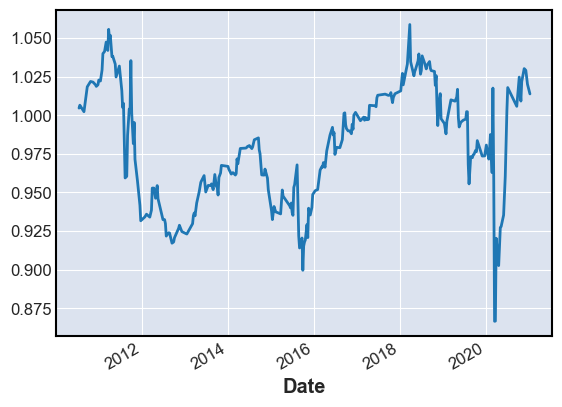

In [6]:
df[(df['close_lag1'] > df['Open']) & (df['day_name'] == 'Monday')]['diff'].cumprod().plot()

## Hold the position until the next close

<AxesSubplot:xlabel='Date'>

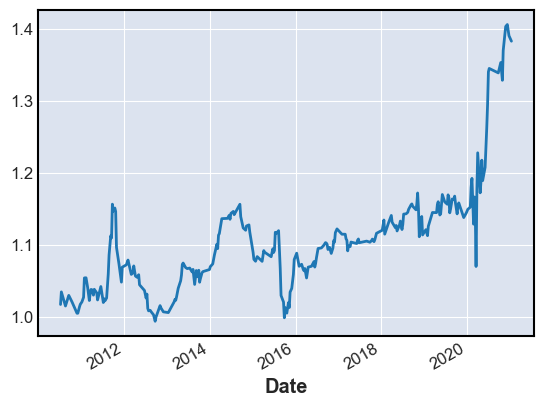

In [7]:
df['diff'] = df['Close'].shift(-1) / df['Open']
df[(df['close_lag1'] > df['Open']) & (df['day_name'] == 'Monday')]['diff'].cumprod().plot()

## Holding for the close six days

<AxesSubplot:xlabel='Date'>

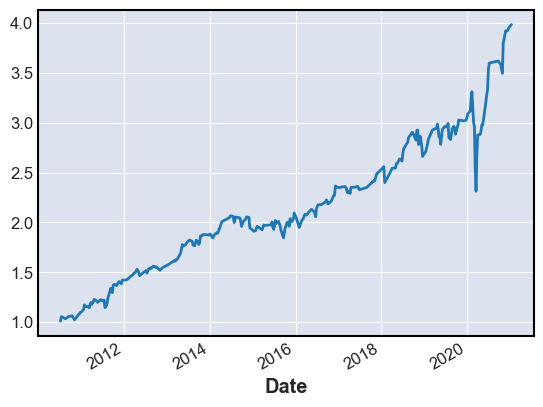

In [8]:
df['diff'] = df['Close'].shift(-6) / df['Open']
df[(df['close_lag1'] > df['Open']) & (df['day_name'] == 'Monday')]['diff'].cumprod().plot()